## Performance de uma carteira de ativos

###### Importando as bibliotecas

In [72]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf

###### Importando os dados

In [73]:
carteira = pd.read_excel('carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDI3,Ação,100
9,NTCO3,Ação,100


###### Criando nosso Dataframe de Cotações dos ativos da carteira

In [74]:
cotacoes_carteira = pd.DataFrame()

for ativo in carteira['Ativos']:
  cotacoes_carteira[ativo] = yf.download('{}.SA'.format(ativo), start='2020-01-01', end='2020-11-10', progress=False)['Adj Close']
  
display(cotacoes_carteira)


1 Failed download:
- GNDI3.SA: No timezone found, symbol may be delisted


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029736,24.539316,33.930656,10.9650,17.323145,17.714905,NaN,38.093487,111.485657,138.026382,184.888382,NaN
2020-01-03,113.800003,140.899994,11.922435,24.551733,33.573753,11.0675,17.783207,17.766314,NaN,40.747009,112.819679,136.173660,184.888382,NaN
2020-01-06,112.589996,139.100006,11.932189,24.113205,33.074123,11.3500,17.848873,17.740610,NaN,39.882378,111.936226,137.618805,183.387756,NaN
2020-01-07,112.239998,139.399994,11.898048,23.694288,32.306828,11.2650,17.813240,17.811390,NaN,40.528366,112.086411,133.237152,184.101059,NaN
2020-01-08,111.949997,138.199997,12.263844,23.327751,31.780409,11.2125,17.902308,17.653536,NaN,40.737072,110.054420,129.198257,173.680237,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,92.260002,109.980003,24.945910,15.158895,21.936384,13.8050,16.129892,16.902939,NaN,46.143505,94.964661,115.979218,146.650925,116.904800
2020-11-04,94.160004,112.000000,26.143793,15.048989,22.812376,14.4000,16.512877,17.820774,NaN,47.375851,94.973503,117.618858,146.706528,117.042320
2020-11-05,96.949997,115.900002,27.401571,15.281860,23.350748,14.6775,17.474792,18.608171,NaN,49.969746,94.973503,118.925018,146.521271,117.317360


###### Validando as informações geradas

In [75]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-09
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   GNDI3   0 non-null      float64
 9   NTCO3   214 non-null    float64
 10  BCRI11  214 non-null    float64
 11  VILG11  214 non-null    float64
 12  KNRI11  214 non-null    float64
 13  XPLG11  109 non-null    float64
dtypes: float64(14)
memory usage: 25.1 KB


###### Ajustando os dados validados que estão como nulos

In [76]:
df_media = cotacoes_carteira.mean()
# cotacoes_carteira = cotacoes_carteira.fillna(df_media)
cotacoes_carteira = cotacoes_carteira.ffill()

display(cotacoes_carteira)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029736,24.539316,33.930656,10.9650,17.323145,17.714905,NaN,38.093487,111.485657,138.026382,184.888382,NaN
2020-01-03,113.800003,140.899994,11.922435,24.551733,33.573753,11.0675,17.783207,17.766314,NaN,40.747009,112.819679,136.173660,184.888382,NaN
2020-01-06,112.589996,139.100006,11.932189,24.113205,33.074123,11.3500,17.848873,17.740610,NaN,39.882378,111.936226,137.618805,183.387756,NaN
2020-01-07,112.239998,139.399994,11.898048,23.694288,32.306828,11.2650,17.813240,17.811390,NaN,40.528366,112.086411,133.237152,184.101059,NaN
2020-01-08,111.949997,138.199997,12.263844,23.327751,31.780409,11.2125,17.902308,17.653536,NaN,40.737072,110.054420,129.198257,173.680237,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,92.260002,109.980003,24.945910,15.158895,21.936384,13.8050,16.129892,16.902939,NaN,46.143505,94.964661,115.979218,146.650925,116.904800
2020-11-04,94.160004,112.000000,26.143793,15.048989,22.812376,14.4000,16.512877,17.820774,NaN,47.375851,94.973503,117.618858,146.706528,117.042320
2020-11-05,96.949997,115.900002,27.401571,15.281860,23.350748,14.6775,17.474792,18.608171,NaN,49.969746,94.973503,118.925018,146.521271,117.317360


###### Analisando a performance da carteira de forma individual para normalizar os dados

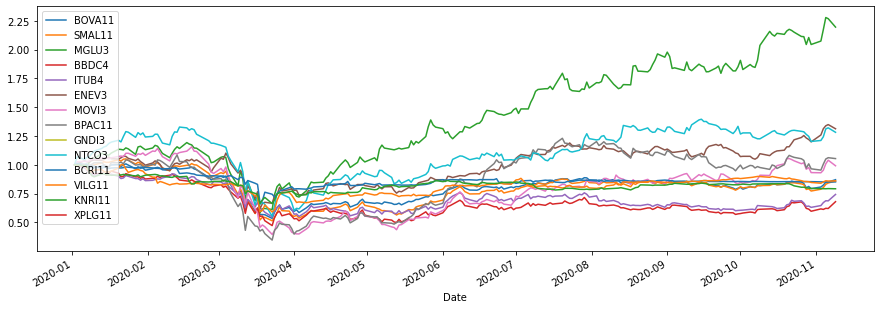

In [77]:
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]
carteira_norm.plot(figsize=(15,5))
plt.legend(loc='upper left')

###### Buscando o Ibovespa para comparação

In [78]:
cotacoes_ibov = yf.download('^BVSP', start='2020-01-01', end='2020-11-10', progress=False)
display(cotacoes_ibov)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2020-11-03,93968.0,96250.0,93968.0,95587.0,95587.0,10191800
2020-11-04,95992.0,98296.0,95987.0,97811.0,97811.0,10704600
2020-11-05,97873.0,100922.0,97872.0,100774.0,100774.0,10455300


###### Criando um Dataframe da Carteira com as quantidades de ações

In [80]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
  valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos'] == ativo, 'Qtde'].values[0]

# Remover GNDI3 pois não tem cotação
valor_investido = valor_investido.drop('GNDI3', axis=1)

display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.735565,2453.931618,3393.065643,3289.500046,1732.314491,1771.490479,3809.348679,11148.565674,13802.638245,18488.838196,NaN
2020-01-03,11380.000305,14089.999390,11922.434807,2455.173302,3357.375336,3320.250034,1778.320694,1776.631355,4074.700928,11281.967926,13617.366028,18488.838196,NaN
2020-01-06,11258.999634,13910.000610,11932.188988,2411.320496,3307.412338,3405.000114,1784.887314,1774.061012,3988.237762,11193.622589,13761.880493,18338.775635,NaN
2020-01-07,11223.999786,13939.999390,11898.048401,2369.428825,3230.682755,3379.500103,1781.324005,1781.138992,4052.836609,11208.641052,13323.715210,18410.105896,NaN
2020-01-08,11194.999695,13819.999695,12263.843536,2332.775116,3178.040886,3363.749886,1790.230751,1765.353584,4073.707199,11005.442047,12919.825745,17368.023682,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,9226.000214,10998.000336,24945.909500,1515.889454,2193.638420,4141.500092,1612.989235,1690.293884,4614.350510,9496.466064,11597.921753,14665.092468,11690.480042
2020-11-04,9416.000366,11200.000000,26143.793106,1504.898930,2281.237602,4319.999886,1651.287651,1782.077408,4737.585068,9497.350311,11761.885834,14670.652771,11704.232025
2020-11-05,9694.999695,11590.000153,27401.571274,1528.186035,2335.074806,4403.249931,1747.479248,1860.817146,4996.974564,9497.350311,11892.501831,14652.127075,11731.735992


###### Carteira x IBOV

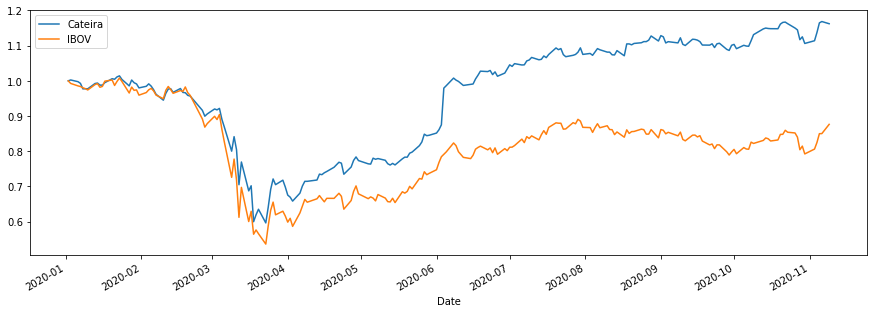

In [93]:
valor_investido['Total'] = valor_investido.sum(axis=1)

valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacoes_ibov_norm = cotacoes_ibov / cotacoes_ibov.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15,5), label='Cateira')
cotacoes_ibov_norm['Adj Close'].plot(figsize=(15,5), label='IBOV')
plt.legend()
plt.show()

In [96]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0]
retorno_ibov = cotacoes_ibov['Adj Close'][-1] / cotacoes_ibov['Adj Close'][0]
print('Retorno carteira: {:.2f}%'.format(retorno_carteira))
print('Retorno IBOV: {:.2f}%'.format(retorno_ibov))

Retorno carteira: 1.16%
Retorno IBOV: 0.88%


###### Correlação da Carteira com o IBOV

In [97]:
correlacao = valor_investido['Total'].corr(cotacoes_ibov['Adj Close'])
print('Correlação: {:.2f}%'.format(correlacao))

Correlação: 0.71%
